## Reading grid jsons 

In [21]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
#plt.rcParams["figure.figsize"] = (6,5)
plt.rcParams["figure.figsize"] = (7,7)
#plt.rcParams["figure.figsize"] = (10,10)
#mpl.rcParams['figure.dpi'] = 800
#mpl.rcParams['figure.figsize'] = [60, 60]

import pandas as pd
import os,json
from pathlib import Path

from pylatex import Document, Package, Section, NoEscape
 
## Read file names
path_to_json = Path(os.getcwd() + "/CPU_and_GPU/cpu-grid-results/").glob("**/*.json")
CPU_files_grid = [str(path) for path in path_to_json]

path_to_json = Path(os.getcwd() + "/CPU_and_GPU/gpu-grid-results/").glob("**/*.json")
GPU_files_grid = [str(path) for path in path_to_json]

# Read json of CPU file
CPU_data_grid_to_append = []
for files in CPU_files_grid:
    CPU_data_grid_to_append.append(pd.read_json(files, typ='series', orient='index'))

# Read json of GPU file
GPU_data_to_append_grid = []
for files in GPU_files_grid:
    GPU_data_to_append_grid.append(pd.read_json(files, typ='series', orient='index'))

##Concat all dataframe and transpose it
CPU_data_time_grid = pd.concat(CPU_data_grid_to_append, axis=1)
CPU_data_time_grid = CPU_data_time_grid.transpose()

##Concat all dataframe and transpose it
GPU_data_time_grid = pd.concat(GPU_data_to_append_grid, axis=1)
GPU_data_time_grid = GPU_data_time_grid.transpose()


# Drop column parallel from GPU_data_time_grid
GPU_data_time_grid = GPU_data_time_grid.drop(columns=['parallel'])

#Geometric data as integer
CPU_data_time_grid['n_vertices'] = CPU_data_time_grid['n_vertices'].astype(int)
CPU_data_time_grid['n_half_edges'] = CPU_data_time_grid['n_half_edges'].astype(int)
CPU_data_time_grid['n_faces'] = CPU_data_time_grid['n_faces'].astype(int)
CPU_data_time_grid['n_barrier_edge_tips'] = CPU_data_time_grid['n_barrier_edge_tips'].astype(int)

GPU_data_time_grid['n_vertices'] = GPU_data_time_grid['n_vertices'].astype(int)
GPU_data_time_grid['n_half_edges'] = GPU_data_time_grid['n_half_edges'].astype(int)
GPU_data_time_grid['n_faces'] = GPU_data_time_grid['n_faces'].astype(int)
GPU_data_time_grid['n_barrier_edge_tips'] = GPU_data_time_grid['n_barrier_edge_tips'].astype(int)

#Group by n_vertices and sort by n_vertices in ascending order
CPU_data_time_grid = CPU_data_time_grid.groupby('n_vertices',  as_index=False).mean().sort_values(by='n_vertices')
GPU_data_time_grid = GPU_data_time_grid.groupby('n_vertices',  as_index=False).mean().sort_values(by='n_vertices')



## Convert byte to gb
CPU_data_time_grid['memory_max_edges'] = CPU_data_time_grid['memory_max_edges'] / (1024 ** 3)
CPU_data_time_grid['memory_frontier_edge'] = CPU_data_time_grid['memory_frontier_edge'] / (1024 ** 3)
CPU_data_time_grid['memory_seed_edges'] = CPU_data_time_grid['memory_seed_edges'] / (1024 ** 3)
CPU_data_time_grid['memory_seed_bet_mar'] = CPU_data_time_grid['memory_seed_bet_mar'] / (1024 ** 3)
CPU_data_time_grid['memory_triangle_list'] = CPU_data_time_grid['memory_triangle_list'] / (1024 ** 3)
CPU_data_time_grid['memory_mesh_input'] = CPU_data_time_grid['memory_mesh_input'] / (1024 ** 3)
CPU_data_time_grid['memory_mesh_output'] = CPU_data_time_grid['memory_mesh_output'] / (1024 ** 3)
CPU_data_time_grid['memory_vertices_input'] = CPU_data_time_grid['memory_vertices_input'] / (1024 ** 3)
CPU_data_time_grid['memory_vertices_output'] = CPU_data_time_grid['memory_vertices_output'] / (1024 ** 3)
CPU_data_time_grid['memory_total'] = CPU_data_time_grid['memory_total'] / (1024 ** 3)

# Convertir las columnas de bytes a GB
GPU_data_time_grid['memory_max_edges'] = GPU_data_time_grid['memory_max_edges'] / (1024 ** 3)
GPU_data_time_grid['memory_frontier_edge'] = GPU_data_time_grid['memory_frontier_edge'] / (1024 ** 3)
GPU_data_time_grid['memory_seed_edges'] = GPU_data_time_grid['memory_seed_edges'] / (1024 ** 3)
GPU_data_time_grid['memory_seed_bet_mar'] = GPU_data_time_grid['memory_seed_bet_mar'] / (1024 ** 3)
GPU_data_time_grid['memory_triangle_list'] = GPU_data_time_grid['memory_triangle_list'] / (1024 ** 3)
GPU_data_time_grid['memory_mesh_input'] = GPU_data_time_grid['memory_mesh_input'] / (1024 ** 3)
GPU_data_time_grid['memory_mesh_output'] = GPU_data_time_grid['memory_mesh_output'] / (1024 ** 3)
GPU_data_time_grid['memory_vertices_input'] = GPU_data_time_grid['memory_vertices_input'] / (1024 ** 3)
GPU_data_time_grid['memory_vertices_output'] = GPU_data_time_grid['memory_vertices_output'] / (1024 ** 3)
GPU_data_time_grid['memory_total'] = GPU_data_time_grid['memory_total'] / (1024 ** 3)
GPU_data_time_grid['memory_total_gpu'] = GPU_data_time_grid['memory_total_gpu'] / (1024 ** 3)

# sumar los tiempos de las diferentes operaciones
GPU_data_time_grid['d_total_time'] = GPU_data_time_grid['d_time_copy_to_device'] + \
                                GPU_data_time_grid['d_time_to_label_max_edges'] + \
                                GPU_data_time_grid['d_time_to_label_frontier_edges'] + \
                                GPU_data_time_grid['d_time_to_label_seed_edges'] + \
                                GPU_data_time_grid['d_time_to_label_scan_edges'] + \
                                GPU_data_time_grid['d_time_to_label_compaction_edges'] + \
                                GPU_data_time_grid['d_time_to_label_total'] + \
                                GPU_data_time_grid['d_time_to_traversal_and_repair'] + \
                                GPU_data_time_grid['d_time_to_traversal'] + \
                                GPU_data_time_grid['d_time_to_traversal_search_frontier_edge'] + \
                                GPU_data_time_grid['d_time_to_back_to_host'] + \
                                GPU_data_time_grid['d_time_to_repair']

GPU_data_time_grid['d_total_time_no_copy'] = GPU_data_time_grid['d_time_to_label_max_edges'] + \
                                GPU_data_time_grid['d_time_to_label_frontier_edges'] + \
                                GPU_data_time_grid['d_time_to_label_seed_edges'] + \
                                GPU_data_time_grid['d_time_to_label_scan_edges'] + \
                                GPU_data_time_grid['d_time_to_label_compaction_edges'] + \
                                GPU_data_time_grid['d_time_to_label_total'] + \
                                GPU_data_time_grid['d_time_to_traversal_and_repair'] + \
                                GPU_data_time_grid['d_time_to_traversal'] + \
                                GPU_data_time_grid['d_time_to_traversal_search_frontier_edge'] + \
                                GPU_data_time_grid['d_time_to_repair']


# create new datadrame with the n_vertices of CPU, the d_total_time_no_copy, d_total_time  of GPU and the time_to_generate_polygonal_mesh of CPU
df_speedup = pd.DataFrame({'n_vertices': CPU_data_time_grid['n_vertices'], 'd_total_time_no_copy': GPU_data_time_grid['d_total_time_no_copy'], 'd_total_time': GPU_data_time_grid['d_total_time'], 'time_to_generate_polygonal_mesh': CPU_data_time_grid['time_to_generate_polygonal_mesh']})



# add a column to divie the time_to_generate_polygonal_mesh by the d_total_time_no_copy
df_speedup['speedup'] = df_speedup['time_to_generate_polygonal_mesh'] / df_speedup['d_total_time_no_copy']

# add a column to divie the time_to_generate_polygonal_mesh by the d_total_time
df_speedup['speedup_with_copy'] = df_speedup['time_to_generate_polygonal_mesh'] / df_speedup['d_total_time']


# Reading uniform results

In [22]:

## Read file names
path_to_json = Path(os.getcwd() + "/CPU_and_GPU/cpu-uniform-results/").glob("**/*.json")
CPU_files_uniform = [str(path) for path in path_to_json]

path_to_json = Path(os.getcwd() + "/CPU_and_GPU/gpu-uniform-results/").glob("**/*.json")
GPU_files_uniform = [str(path) for path in path_to_json]

# Read json of CPU file
CPU_data_uniform_to_append = []
for files in CPU_files_uniform:
    CPU_data_uniform_to_append.append(pd.read_json(files, typ='series', orient='index'))

# Read json of GPU file
GPU_data_to_append_uniform = []
for files in GPU_files_uniform:
    GPU_data_to_append_uniform.append(pd.read_json(files, typ='series', orient='index'))

##Concat all dataframe and transpose it
CPU_data_time_uniform = pd.concat(CPU_data_uniform_to_append, axis=1)
CPU_data_time_uniform = CPU_data_time_uniform.transpose()

##Concat all dataframe and transpose it
GPU_data_time_uniform = pd.concat(GPU_data_to_append_uniform, axis=1)
GPU_data_time_uniform = GPU_data_time_uniform.transpose()


# Drop column parallel from GPU_data_time_uniform
GPU_data_time_uniform = GPU_data_time_uniform.drop(columns=['parallel'])

#Geometric data as integer
CPU_data_time_uniform['n_vertices'] = CPU_data_time_uniform['n_vertices'].astype(int)
CPU_data_time_uniform['n_half_edges'] = CPU_data_time_uniform['n_half_edges'].astype(int)
CPU_data_time_uniform['n_faces'] = CPU_data_time_uniform['n_faces'].astype(int)
CPU_data_time_uniform['n_barrier_edge_tips'] = CPU_data_time_uniform['n_barrier_edge_tips'].astype(int)

GPU_data_time_uniform['n_vertices'] = GPU_data_time_uniform['n_vertices'].astype(int)
GPU_data_time_uniform['n_half_edges'] = GPU_data_time_uniform['n_half_edges'].astype(int)
GPU_data_time_uniform['n_faces'] = GPU_data_time_uniform['n_faces'].astype(int)
GPU_data_time_uniform['n_barrier_edge_tips'] = GPU_data_time_uniform['n_barrier_edge_tips'].astype(int)

#Group by n_vertices and sort by n_vertices in ascending order
CPU_data_time_uniform = CPU_data_time_uniform.groupby('n_vertices',  as_index=False).mean().sort_values(by='n_vertices')
GPU_data_time_uniform = GPU_data_time_uniform.groupby('n_vertices',  as_index=False).mean().sort_values(by='n_vertices')



## Convert byte to gb
CPU_data_time_uniform['memory_max_edges'] = CPU_data_time_uniform['memory_max_edges'] / (1024 ** 3)
CPU_data_time_uniform['memory_frontier_edge'] = CPU_data_time_uniform['memory_frontier_edge'] / (1024 ** 3)
CPU_data_time_uniform['memory_seed_edges'] = CPU_data_time_uniform['memory_seed_edges'] / (1024 ** 3)
CPU_data_time_uniform['memory_seed_bet_mar'] = CPU_data_time_uniform['memory_seed_bet_mar'] / (1024 ** 3)
CPU_data_time_uniform['memory_triangle_list'] = CPU_data_time_uniform['memory_triangle_list'] / (1024 ** 3)
CPU_data_time_uniform['memory_mesh_input'] = CPU_data_time_uniform['memory_mesh_input'] / (1024 ** 3)
CPU_data_time_uniform['memory_mesh_output'] = CPU_data_time_uniform['memory_mesh_output'] / (1024 ** 3)
CPU_data_time_uniform['memory_vertices_input'] = CPU_data_time_uniform['memory_vertices_input'] / (1024 ** 3)
CPU_data_time_uniform['memory_vertices_output'] = CPU_data_time_uniform['memory_vertices_output'] / (1024 ** 3)
CPU_data_time_uniform['memory_total'] = CPU_data_time_uniform['memory_total'] / (1024 ** 3)

# Convertir las columnas de bytes a GB
GPU_data_time_uniform['memory_max_edges'] = GPU_data_time_uniform['memory_max_edges'] / (1024 ** 3)
GPU_data_time_uniform['memory_frontier_edge'] = GPU_data_time_uniform['memory_frontier_edge'] / (1024 ** 3)
GPU_data_time_uniform['memory_seed_edges'] = GPU_data_time_uniform['memory_seed_edges'] / (1024 ** 3)
GPU_data_time_uniform['memory_seed_bet_mar'] = GPU_data_time_uniform['memory_seed_bet_mar'] / (1024 ** 3)
GPU_data_time_uniform['memory_triangle_list'] = GPU_data_time_uniform['memory_triangle_list'] / (1024 ** 3)
GPU_data_time_uniform['memory_mesh_input'] = GPU_data_time_uniform['memory_mesh_input'] / (1024 ** 3)
GPU_data_time_uniform['memory_mesh_output'] = GPU_data_time_uniform['memory_mesh_output'] / (1024 ** 3)
GPU_data_time_uniform['memory_vertices_input'] = GPU_data_time_uniform['memory_vertices_input'] / (1024 ** 3)
GPU_data_time_uniform['memory_vertices_output'] = GPU_data_time_uniform['memory_vertices_output'] / (1024 ** 3)
GPU_data_time_uniform['memory_total'] = GPU_data_time_uniform['memory_total'] / (1024 ** 3)
GPU_data_time_uniform['memory_total_gpu'] = GPU_data_time_uniform['memory_total_gpu'] / (1024 ** 3)

# sumar los tiempos de las diferentes operaciones
GPU_data_time_uniform['d_total_time'] = GPU_data_time_uniform['d_time_copy_to_device'] + \
                                GPU_data_time_uniform['d_time_to_label_max_edges'] + \
                                GPU_data_time_uniform['d_time_to_label_frontier_edges'] + \
                                GPU_data_time_uniform['d_time_to_label_seed_edges'] + \
                                GPU_data_time_uniform['d_time_to_label_scan_edges'] + \
                                GPU_data_time_uniform['d_time_to_label_compaction_edges'] + \
                                GPU_data_time_uniform['d_time_to_label_total'] + \
                                GPU_data_time_uniform['d_time_to_traversal_and_repair'] + \
                                GPU_data_time_uniform['d_time_to_traversal'] + \
                                GPU_data_time_uniform['d_time_to_traversal_search_frontier_edge'] + \
                                GPU_data_time_uniform['d_time_to_back_to_host'] + \
                                GPU_data_time_uniform['d_time_to_repair']

GPU_data_time_uniform['d_total_time_no_copy'] = GPU_data_time_uniform['d_time_to_label_max_edges'] + \
                                GPU_data_time_uniform['d_time_to_label_frontier_edges'] + \
                                GPU_data_time_uniform['d_time_to_label_seed_edges'] + \
                                GPU_data_time_uniform['d_time_to_label_scan_edges'] + \
                                GPU_data_time_uniform['d_time_to_label_compaction_edges'] + \
                                GPU_data_time_uniform['d_time_to_label_total'] + \
                                GPU_data_time_uniform['d_time_to_traversal_and_repair'] + \
                                GPU_data_time_uniform['d_time_to_traversal'] + \
                                GPU_data_time_uniform['d_time_to_traversal_search_frontier_edge'] + \
                                GPU_data_time_uniform['d_time_to_repair']


# create new datadrame with the n_vertices of CPU, the d_total_time_no_copy, d_total_time  of GPU and the time_to_generate_polygonal_mesh of CPU
df_speedup_uniform = pd.DataFrame({'n_vertices': CPU_data_time_uniform['n_vertices'], 'd_total_time_no_copy': GPU_data_time_uniform['d_total_time_no_copy'], 'd_total_time': GPU_data_time_uniform['d_total_time'], 'time_to_generate_polygonal_mesh': CPU_data_time_uniform['time_to_generate_polygonal_mesh']})



# add a column to divie the time_to_generate_polygonal_mesh by the d_total_time_no_copy
df_speedup_uniform['speedup'] = df_speedup_uniform['time_to_generate_polygonal_mesh'] / df_speedup_uniform['d_total_time_no_copy']

# add a column to divie the time_to_generate_polygonal_mesh by the d_total_time
df_speedup_uniform['speedup_with_copy'] = df_speedup_uniform['time_to_generate_polygonal_mesh'] / df_speedup_uniform['d_total_time']

# Gráficos grid

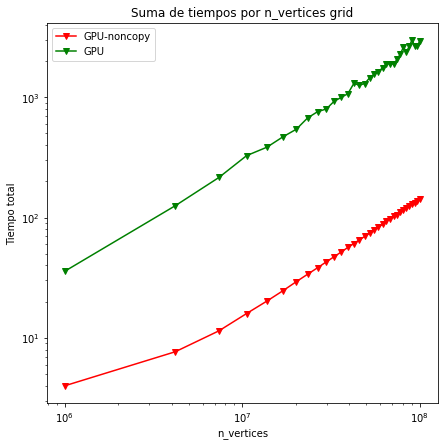

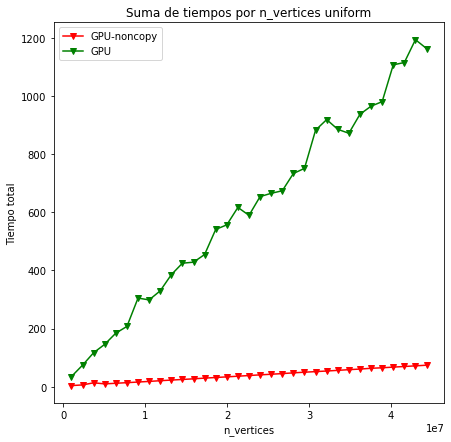

In [23]:
# graficar la suma de los tiempos por n_vertices
import matplotlib.pyplot as plt

plt.plot(GPU_data_time_grid['n_vertices'], GPU_data_time_grid['d_total_time_no_copy'],  c="red",marker="v", label='GPU-noncopy')
plt.plot(GPU_data_time_grid['n_vertices'], GPU_data_time_grid['d_total_time'],  c="green",marker="v", label='GPU')
#plt.plot(CPU_data_time_grid['n_vertices'], CPU_data_time_grid['time_to_generate_polygonal_mesh'], c="blue",marker="o", label='CPU')
plt.xlabel('n_vertices')
plt.ylabel('Tiempo total')
plt.yscale('log')
plt.xscale('log')
plt.title('Suma de tiempos por n_vertices grid')
plt.legend()
plt.show()

# graficar la suma de los tiempos por n_vertices
import matplotlib.pyplot as plt

plt.plot(GPU_data_time_uniform['n_vertices'], GPU_data_time_uniform['d_total_time_no_copy'],  c="red",marker="v", label='GPU-noncopy')
plt.plot(GPU_data_time_uniform['n_vertices'], GPU_data_time_uniform['d_total_time'],  c="green",marker="v", label='GPU')
#plt.plot(CPU_data_time_uniform['n_vertices'], CPU_data_time_uniform['time_to_generate_polygonal_mesh'], c="blue",marker="o", label='CPU')
plt.xlabel('n_vertices')
plt.ylabel('Tiempo total')
plt.title('Suma de tiempos por n_vertices uniform')
plt.legend()
plt.show()





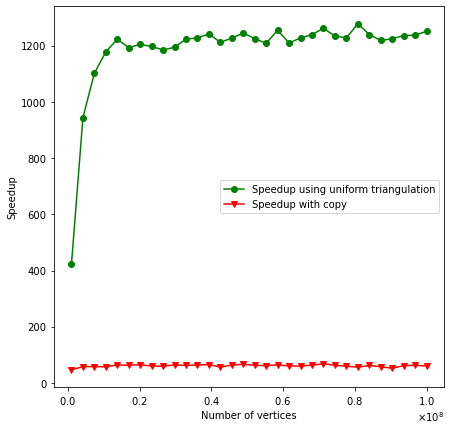

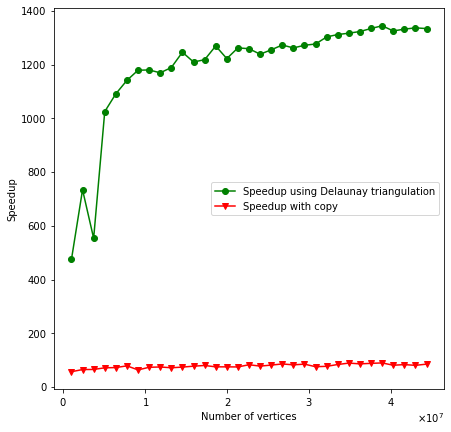

    n_vertices  d_total_time_no_copy  d_total_time  \
0      1000000              4.270353     35.495953   
1      2353515              6.611212     74.506332   
2      3707030             13.899284    117.416304   
3      5060545             10.212090    146.215270   
4      6414060             12.273365    184.656765   
5      7767575             14.366907    207.747947   
6      9121090             16.518808    305.209888   
7     10474605             18.649829    298.871629   
8     11828120             21.089524    330.087924   
9     13181635             23.295396    385.616596   
10    14535150             25.335955    425.076555   
11    15888665             27.540398    428.588998   
12    17242180             29.984698    454.896498   
13    18595695             32.085279    541.130879   
14    19949210             34.255539    556.907339   
15    21302725             36.577499    616.838899   
16    22656240             38.889871    589.601871   
17    24009755             4

In [24]:
# Plot speedup
plt.plot(df_speedup['n_vertices'], df_speedup['speedup'], c="green",marker="o", label='Speedup using uniform triangulation')
plt.plot(df_speedup['n_vertices'], df_speedup['speedup_with_copy'], c="red",marker="v", label='Speedup with copy')
plt.xlabel('Number of vertices')
plt.ylabel('Speedup')
plt.legend()
#plt.yscale('log')
plt.ticklabel_format(style='sci', useMathText=True,  axis='x', scilimits=(0,0))
plt.savefig(r'speedup_uniform.pdf', bbox_inches='tight', dpi=300)
plt.show()

# Plot speedup
plt.plot(df_speedup_uniform['n_vertices'], df_speedup_uniform['speedup'], c="green",marker="o", label='Speedup using Delaunay triangulation')
plt.plot(df_speedup_uniform['n_vertices'], df_speedup_uniform['speedup_with_copy'], c="red",marker="v", label='Speedup with copy')
plt.xlabel('Number of vertices')
plt.ylabel('Speedup')
#plt.yscale('log')

plt.ticklabel_format(style='sci', useMathText=True,  axis='x', scilimits=(0,0))
plt.legend()
plt.savefig(r'speedup_delaunay.pdf', bbox_inches='tight', dpi=300)
plt.show()


print(df_speedup_uniform)


# Preguntas

In [25]:
# Uniform
print("\n\n\n Uniform \n\n\n")
# Cuanto es el promedio del speedup
print("Promedio del speedup uniform: ", df_speedup['speedup'].mean())

# Cuanto es el promedio del speedup con copia
print("Promedio del speedup uniform con copia: ", df_speedup['speedup_with_copy'].mean())

# Cuanto es el máximo del speedup
print("Máximo del speedup uniform: ", df_speedup['speedup'].max())

# Delaunay
print("\n\n\n Delaunay \n\n\n")
# Cuanto es el promedio del speedup
print("Promedio del speedup delaunay: ", df_speedup_uniform['speedup'].mean())

# Cuanto es el promedio del speedup con copia
print("Promedio del speedup delaunay con copia: ", df_speedup_uniform['speedup_with_copy'].mean())

# Cuanto es el máximo del speedup
print("Máximo del speedup delaunay: ", df_speedup_uniform['speedup'].max())


# Tiempo promedi de copiar CPU a GPU es del 95.5% para la última columna





 Uniform 



Promedio del speedup uniform:  1187.1294860354956
Promedio del speedup uniform con copia:  61.07829107762303
Máximo del speedup uniform:  1277.7183508965875



 Delaunay 



Promedio del speedup delaunay:  1189.8305167190695
Promedio del speedup delaunay con copia:  77.89476749078266
Máximo del speedup delaunay:  1344.4819984497396


# gRAFICOPS POLYLLA


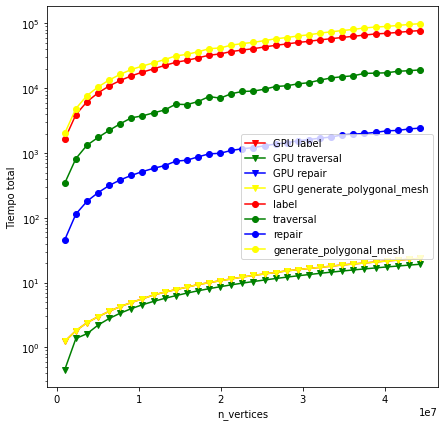

In [26]:
# pLOT polylla phases 
# GPU
plt.plot(GPU_data_time_uniform['n_vertices'], GPU_data_time_uniform['d_time_to_label_total'],  c="red",marker="v", label='GPU label')
plt.plot(GPU_data_time_uniform['n_vertices'], GPU_data_time_uniform['d_time_to_traversal'],  c="green",marker="v", label='GPU traversal')
plt.plot(GPU_data_time_uniform['n_vertices'], GPU_data_time_uniform['d_time_to_repair'],  c="blue",marker="v", label='GPU repair')
plt.plot(GPU_data_time_uniform['n_vertices'], GPU_data_time_uniform['d_time_to_generate_polygonal_mesh'],  c="yellow",marker="v", label='GPU generate_polygonal_mesh')
plt.plot(CPU_data_time_uniform['n_vertices'], CPU_data_time_uniform['time_to_label_total'],  c="red",marker="o", label='label')
plt.plot(CPU_data_time_uniform['n_vertices'], CPU_data_time_uniform['time_to_traversal'],  c="green",marker="o", label='traversal')
plt.plot(CPU_data_time_uniform['n_vertices'], CPU_data_time_uniform['time_to_repair'],  c="blue",marker="o", label='repair')
plt.plot(CPU_data_time_uniform['n_vertices'], CPU_data_time_uniform['time_to_generate_polygonal_mesh'],  c="yellow",marker="o", label='generate_polygonal_mesh')
plt.xlabel('n_vertices')
plt.ylabel('Tiempo total')
plt.legend()
#loglog
plt.yscale('log')
plt.show()



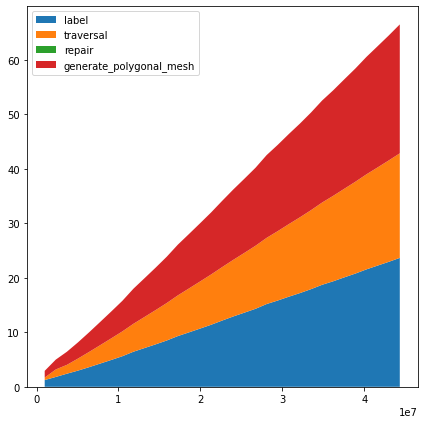

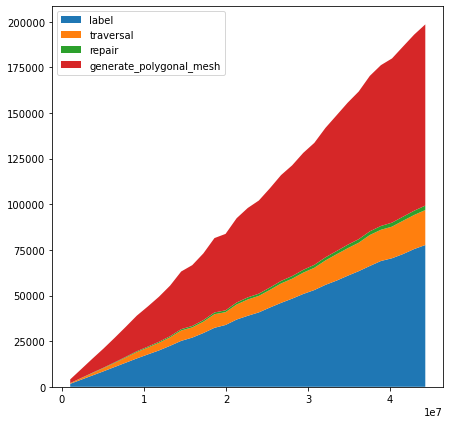

In [27]:
# GPU
plt.stackplot(GPU_data_time_uniform['n_vertices'], 
              GPU_data_time_uniform['d_time_to_label_total'],
              GPU_data_time_uniform['d_time_to_traversal'], 
              GPU_data_time_uniform['d_time_to_repair'],
              GPU_data_time_uniform['d_time_to_generate_polygonal_mesh'],
              labels=['label', 'traversal', 'repair', 'generate_polygonal_mesh'])
plt.legend(loc='upper left')
plt.show()

# CPU
plt.stackplot(CPU_data_time_uniform['n_vertices'], 
              CPU_data_time_uniform['time_to_label_total'],
              CPU_data_time_uniform['time_to_traversal'], 
              CPU_data_time_uniform['time_to_repair'],
              CPU_data_time_uniform['time_to_generate_polygonal_mesh'],
              labels=['label', 'traversal', 'repair', 'generate_polygonal_mesh'])
plt.legend(loc='upper left')
plt.show()


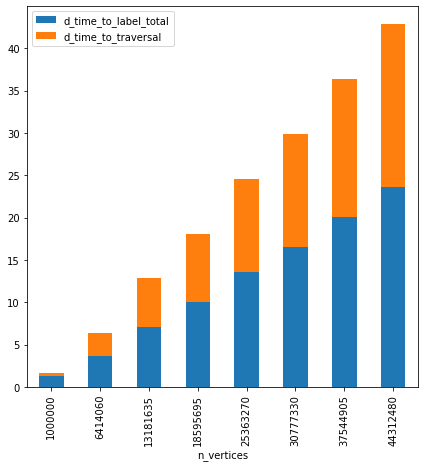

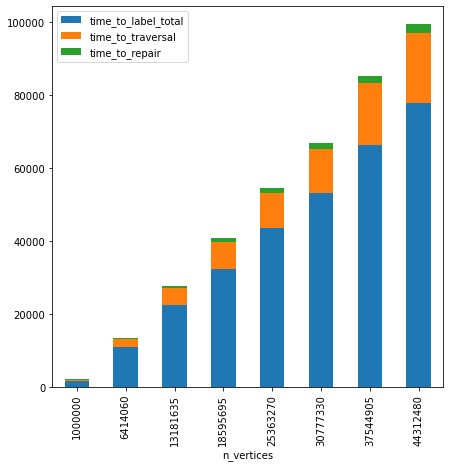

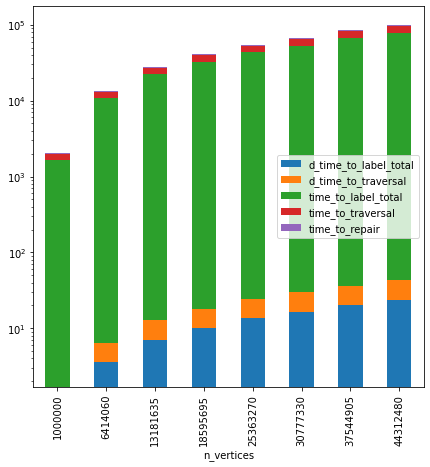

In [28]:
# bar plot d_time_to_label_total and d_time_to_traversal
GPU_delaunay_barplot = GPU_data_time_uniform[['n_vertices', 'd_time_to_label_total', 'd_time_to_traversal', 'd_time_to_repair']].copy()
#set n_vertices as index
GPU_delaunay_barplot = GPU_delaunay_barplot.set_index('n_vertices')
GPU_delaunay_barplot = GPU_delaunay_barplot.iloc[[int(i * (len(GPU_delaunay_barplot.index) - 1) / 7) for i in range(8)]]
GPU_delaunay_barplot[['d_time_to_label_total', 'd_time_to_traversal']].plot(kind='bar', stacked=True)
plt.show()

# bar plot time_to_label_total, time_to_traversal and time_to_repair in CPU
CPU_delaunay_barplot = CPU_data_time_uniform[['n_vertices', 'time_to_label_total', 'time_to_traversal', 'time_to_repair']].copy()
#set n_vertices as index
CPU_delaunay_barplot = CPU_delaunay_barplot.set_index('n_vertices')
CPU_delaunay_barplot = CPU_delaunay_barplot.iloc[[int(i * (len(CPU_delaunay_barplot.index) - 1) / 7) for i in range(8)]]
CPU_delaunay_barplot[['time_to_label_total', 'time_to_traversal', 'time_to_repair']].plot(kind='bar', stacked=True)
plt.show()

# Combinar los dos dataframes GPU_delaunay_barplot y CPU_delaunay_barplot
# https://stackoverflow.com/questions/38013794/combine-two-dataframes-into-one-with-multiple-columns
df = pd.concat([GPU_delaunay_barplot, CPU_delaunay_barplot], axis=1)
df[['d_time_to_label_total', 'd_time_to_traversal', 'time_to_label_total', 'time_to_traversal', 'time_to_repair']].plot(kind='bar', stacked=True)
#y log
plt.yscale('log')
plt.show()

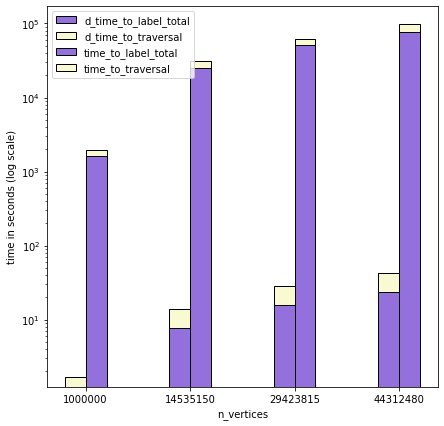

In [29]:
#color_label = '#FF8C00' # Naranja oscuro
#color_travel = '#ADD8E6' # Azul claro

color_label = '#FFC0CB' # Rosa pálido
color_travel = '#006400' # Verde oscuro

color_label = '#FFD700' # Amarillo
color_travel = '#1E90FF' # Azul oscuro

color_label = '#7CFC00' # Verde claro
color_travel = '#8B0000' # Rojo oscuro

color_label = '#00CED1' # Turquesa
color_travel = '#9932CC' # Púrpura

color_label = '#9370DB' # Morado
color_travel = '#FAFAD2' # Amarillo pálido



n_bars = 4

# bar plot d_time_to_label_total and d_time_to_traversal
GPU_delaunay_barplot = GPU_data_time_uniform[['n_vertices', 'd_time_to_label_total', 'd_time_to_traversal', 'd_time_to_repair']].copy()
# Elegir n_bars filas equidistantes
GPU_delaunay_barplot = GPU_delaunay_barplot.iloc[[int(i * (len(GPU_delaunay_barplot.index) - 1) / (n_bars - 1)) for i in range(n_bars)]]
# Dejar últimas 4 columnas
#GPU_delaunay_barplot = GPU_delaunay_barplot.tail(4)

# bar plot time_to_label_total, time_to_traversal and time_to_repair in CPU
CPU_delaunay_barplot = CPU_data_time_uniform[['n_vertices', 'time_to_label_total', 'time_to_traversal', 'time_to_repair']].copy()
# Elegir n_bars filas equidistantes
CPU_delaunay_barplot = CPU_delaunay_barplot.iloc[[int(i * (len(CPU_delaunay_barplot.index) - 1) / (n_bars - 1)) for i in range(n_bars)]]
# Dejar últimas 4 columnas
#CPU_delaunay_barplot = CPU_delaunay_barplot.tail(4)



# Definir el ancho de las barras
ancho = 0.2

# Definir la posición de las barras
posiciones = np.arange(len(GPU_delaunay_barplot))

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Crear las barras del dataframe GPU_delaunay_barplot
ax.bar(
    posiciones - ancho,
    GPU_delaunay_barplot['d_time_to_label_total'],
    width=ancho,
    color=color_label,
    label='d_time_to_label_total',
    edgecolor='black'
)

ax.bar(
    posiciones - ancho,
    GPU_delaunay_barplot['d_time_to_traversal'],
    width=ancho,
    color=color_travel,
    bottom=GPU_delaunay_barplot['d_time_to_label_total'] + GPU_delaunay_barplot['d_time_to_repair'],
    label='d_time_to_traversal',
    edgecolor='black'
)



#ax.bar(
#    posiciones - ancho,
#    GPU_delaunay_barplot['d_time_to_repair'],
#    width=ancho,
#    color='orange',
#    bottom=GPU_delaunay_barplot['d_time_to_label_total'],
#    label='d_time_to_repair'
#)

# Crear las barras del dataframe CPU_delaunay_barplot
ax.bar(
    posiciones,
    CPU_delaunay_barplot['time_to_label_total'],
    width=ancho,
    color=color_label,
    label='time_to_label_total',
    edgecolor='black'
)
ax.bar(
    posiciones,
    CPU_delaunay_barplot['time_to_traversal'],
    width=ancho,
    color=color_travel,
    bottom=CPU_delaunay_barplot['time_to_label_total'],
    label='time_to_traversal',
    edgecolor='black'
)
#ax.bar(
#    posiciones,
#    CPU_delaunay_barplot['time_to_repair'],
#    width=ancho,
#    color='orange',
#    bottom=CPU_delaunay_barplot['time_to_label_total'] + CPU_delaunay_barplot['time_to_traversal'],
#    label='time_to_repair',
#    edgecolor='black'
#)


# Configurar los ejes y la leyenda
ax.set_xlabel('n_vertices')
ax.set_ylabel('time in seconds (log scale)')
ax.set_xticks(posiciones - ancho / 2)
ax.set_xticklabels(GPU_delaunay_barplot['n_vertices'])
ax.legend()
#log
plt.yscale('log')

#Mostrar el gráfico

plt.show()

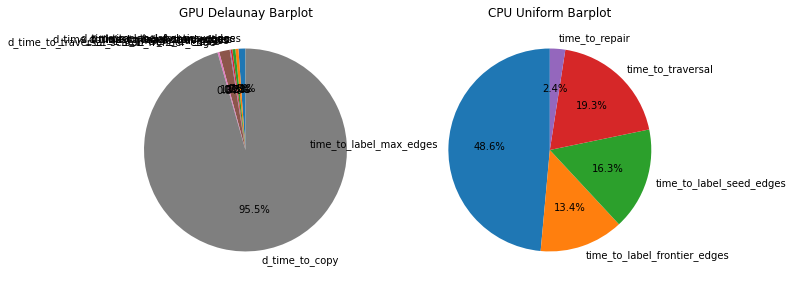

In [30]:
import matplotlib.pyplot as plt
import pandas as pd


#GPU_delaunay_barplot = GPU_data_time_uniform[['n_vertices', 'd_time_to_label_total', 'd_time_to_traversal', 'd_time_to_repair']].copy()
#CPU_delaunay_barplot = CPU_data_time_uniform[['n_vertices', 'time_to_label_total', 'time_to_traversal', 'time_to_repair']].copy()

GPU_delaunay = GPU_data_time_uniform[['n_vertices', 'd_time_to_label_max_edges', 'd_time_to_label_frontier_edges', 'd_time_to_label_seed_edges', 'd_time_to_label_scan_edges', 'd_time_to_label_compaction_edges', 'd_time_to_traversal', 'd_time_to_traversal_search_frontier_edge']].copy()

# sum d_time_copy_to_device and d_time_to_back_to_host to a column called d_time_to_copy
GPU_delaunay['d_time_to_copy'] = GPU_data_time_uniform['d_time_copy_to_device'] + GPU_data_time_uniform['d_time_to_back_to_host']

CPU_delaunay = CPU_data_time_uniform[['n_vertices', 'time_to_label_max_edges', 'time_to_label_frontier_edges', 'time_to_label_seed_edges', 'time_to_traversal', 'time_to_repair']].copy()



# Get the last row of each dataframe
GPU_last_row = GPU_delaunay.iloc[-1]
CPU_last_row = CPU_delaunay.iloc[-1]

# Create pie charts for the last row values
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.pie(GPU_last_row[1:], labels=GPU_last_row.index[1:], autopct='%1.1f%%', startangle=90)
ax1.set_title('GPU Delaunay Barplot')

ax2.pie(CPU_last_row[1:], labels=CPU_last_row.index[1:], autopct='%1.1f%%', startangle=90)
ax2.set_title('CPU Uniform Barplot')

plt.show()
